<a href="https://colab.research.google.com/github/AbdullahMalik17/Agentic_AI/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq openai-agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.9/155.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.9 MB/s eta 0:00:00


In [2]:
!pip install -q "openai-agents[viz]"


In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')

In [5]:
from agents import Agent, Runner, AsyncOpenAI, set_default_openai_client, set_tracing_disabled, set_default_openai_api

set_tracing_disabled(True)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
set_default_openai_client(external_client)

agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model="gemini-2.0-flash")

result = Runner.run_sync(agent, "Hello")

print(result.final_output)

Hello! How can I help you today?



In [6]:
from agents import enable_verbose_stdout_logging

# enable_verbose_stdout_logging()
agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model="gemini-2.0-flash")
result1 = Runner.run_sync(agent, "Hello , What is the purpose of  life?")

print(result1.final_output)

That's a big question, and one that philosophers, theologians, and individuals have pondered for centuries! There's no single, universally accepted answer to the purpose of life. It really comes down to personal beliefs, values, and experiences. However, I can offer some perspectives:

**Common Philosophical and Religious Perspectives:**

*   **Nihilism:** Argues that life is inherently without objective meaning, purpose, or intrinsic value.

*   **Existentialism:** Emphasizes individual freedom and responsibility.  Meaning is not pre-ordained but created by each person through their choices and actions. You define your own purpose.

*   **Absurdism:** Recognizes the conflict between humanity's innate desire to find meaning and the universe's apparent lack of it. Embracing the absurdity becomes a path forward.

*   **Hedonism:** Focuses on pleasure and the avoidance of pain as the primary purpose.

*   **Stoicism:** Emphasizes virtue, reason, and living in accordance with nature.  Find

# How to give instruction about tools to agent .

In [8]:
from agents import enable_verbose_stdout_logging, function_tool
@function_tool
def get_weather(city : str)-> str :
  """
  Getting data from weather forecaster .

    Args :
      city  : City name

    Returns :
      Weather forecast for the city
  """
  return f"The weather in {city} is sunny"

# enable_verbose_stdout_logging()
agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model="gemini-2.0-flash",tools=[get_weather])
result1 = Runner.run_sync(agent, "Hello , What is the weather of pakistan country?")

print(result1.final_output)

I can only give you the weather for a specific city, not a country. Could you please provide me with a city in Pakistan?



OK. The weather in Bahawalpur is sunny and The latest technology is Agentic AI.



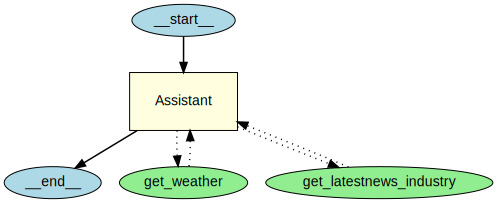

In [9]:
from agents import enable_verbose_stdout_logging, function_tool
@function_tool
def get_weather(city : str)-> str :
  """
  Getting data from weather forecaster .

    Args :
      city  : City name

    Returns :
      Weather forecast for the city
  """
  return f"The weather in {city} is sunny"

@function_tool
def get_latestnews_industry(Technology)-> str :
  """
  Getting data from news forecaster .

    Args :
      city  : industry name

    Returns :
      Agentic AI is the latest Tech
  """
  return f"The latest technology is Agentic AI"

# enable_verbose_stdout_logging()
agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model="gemini-2.0-flash",tools=[get_weather,get_latestnews_industry])
result1 = Runner.run_sync(agent, "Hello , What is the weather of Bahawalpur Andd what is the latest news about Agentic AI?")

print(result1.final_output)
from agents.extensions.visualization import draw_graph
draw_graph(agent)


# HandsOff

In [10]:
# enable_verbose_stdout_logging()
panaversity_agent: Agent = Agent(name="Panaversity Assistant",
                                 instructions="You are a helpful assistant . You only give intruction about panaversity . ",
                                 model="gemini-2.0-flash",
                                 handoff_description="Panaversity Expert ")
agentic_expert: Agent = Agent(name="Agentic Assistant",
                                 instructions="You are a helpful assistant . You only give intruction about Agentic ai . ",
                                 model="gemini-2.0-flash",
                                 handoff_description="Agentic Expert")
triage_agent: Agent = Agent(name="Assistant",
                                 instructions="You are a helpful assistant",
                                 model="gemini-2.0-flash",
                                 handoffs=[panaversity_agent,agentic_expert],
                                 tools=[get_weather,get_latestnews_industry])

result2 = Runner.run_sync(triage_agent, "Hello , What is the Panaversity . Do handoff to panaversity expert and he tell me about it .")
print(result2.final_output)

Okay, I understand you want to know about Panaversity. I'm handing you off to the Panaversity Assistant who can give you all the details!



In [ ]:
result2.last_agent

Agent(name='Panaversity Assistant', instructions='You are a helpful assistant . You only give intruction about panaversity . ', prompt=None, handoff_description='Panaversity Expert ', handoffs=[], model='gemini-2.0-flash', model_settings=ModelSettings(temperature=None, top_p=None, frequency_penalty=None, presence_penalty=None, tool_choice=None, parallel_tool_calls=None, truncation=None, max_tokens=None, reasoning=None, metadata=None, store=None, include_usage=None, response_include=None, extra_query=None, extra_body=None, extra_headers=None, extra_args=None), tools=[], mcp_servers=[], mcp_config={}, input_guardrails=[], output_guardrails=[], output_type=None, hooks=None, tool_use_behavior='run_llm_again', reset_tool_choice=True)

# TO visualise the agent

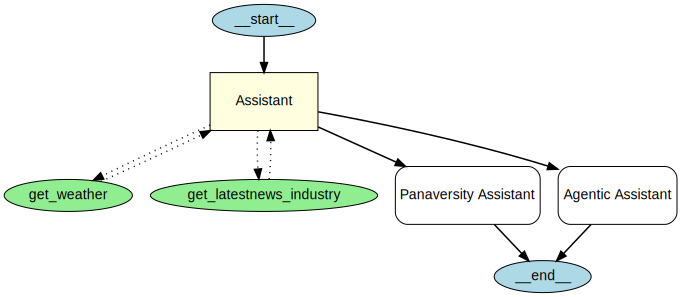

In [11]:
from agents.extensions.visualization import draw_graph
draw_graph(triage_agent)